## 다중 클래스 분류
- 한국 음식 분류 모델

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image # 이미지 파일을 연결하고 변환가능한 객체 생성해주는 라이브러리
import os, glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
# Pillow :이미지 처리 라이브러리
# PIL(Python Imaging Library) 후속으로 사용


### 데이터 준비

In [4]:
# 분류 데이터 로딩을 위해 카테고리 지정
# 데이터 저장된 기본 폴더 설정
root_dir = './kfood/'

# 카테고리   
categories = ["Chicken", "Dolsotbab", "Jeyugbokkeum", "Kimchi", "Samgyeobsal", "SoybeanPasteStew"]

n_classes = len(categories)

In [5]:
n_classes

6

In [11]:
# 이미지 전처리
# 이미지 전처리

X =[]
Y =[]

# 이미지 크기 지정
image_width = 64
image_height = 64

for idx, category in enumerate(categories):
    image_dir = root_dir + category
    files = glob.glob(image_dir + "/" + "*.jpg")
    # print('files: ' + str(idx), files)
    # print(image_dir + "/" + "*.jpg")
    
    # 이미지 전처리 : 이미지 읽어오기 >> 색상 설정 >> resize 진행 
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_width, image_height))
        data = np.asarray(img) # array로 변환
        X.append(data) # feature 값
        Y.append(idx) # target 값

In [12]:
files

['./kfood/SoybeanPasteStew\\SoybeanPasteStew11.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew12.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew13.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew14.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew15.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew16.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew17.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew18.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew19.jpg',
 './kfood/SoybeanPasteStew\\SoybeanPasteStew20.jpg']

In [13]:
X # 리스트 

[array([[[105,  39,   0],
         [110,  41,   1],
         [113,  41,   1],
         ...,
         [ 98,  40,   9],
         [ 92,  36,   6],
         [ 84,  34,   2]],
 
        [[104,  42,   4],
         [109,  44,   7],
         [112,  44,   8],
         ...,
         [ 97,  37,   5],
         [ 92,  34,   4],
         [ 89,  33,   1]],
 
        [[ 94,  36,   2],
         [ 98,  39,   5],
         [102,  39,   6],
         ...,
         [101,  38,   3],
         [ 98,  37,   3],
         [103,  39,   5]],
 
        ...,
 
        [[ 88, 128, 183],
         [115, 152, 197],
         [135, 163, 202],
         ...,
         [109, 146, 196],
         [133, 162, 205],
         [155, 180, 218]],
 
        [[ 99, 131, 174],
         [135, 161, 200],
         [154, 171, 202],
         ...,
         [105, 139, 183],
         [128, 155, 194],
         [146, 169, 204]],
 
        [[175, 187, 208],
         [186, 193, 210],
         [202, 202, 212],
         ...,
         [165, 186, 212],
  

In [14]:
Y # 카테고리값 (0~5)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

### 합성곱 신경망 모델 생성

In [15]:
# 리스트 형태를 array로 변환
X = np.array(X) # 피처
Y = np.array(Y) # 레이블

In [16]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100)

In [17]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(37, 64, 64, 3)

(37,)

(13, 64, 64, 3)

(13,)

In [18]:
y_test

array([0, 4, 4, 3, 5, 5, 0, 4, 3, 5, 0, 1, 1])

In [19]:
# 데이터 변환
from  keras.utils import to_categorical

# 표준화
X_train = X_train / 255
X_test = X_test / 255

# 카테고리 변수 원-핫 인코딩 수행
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_test.shape

(13, 6)

In [21]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [23]:
# (1) 모델 설정 

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(6, activation="softmax"))

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,239,558 (4.73 MB)

 Trainable params: 1,239,558 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# (2) 컴파일
model.compile(loss='categorical_crossentropy',  # 다중 클래스 분류
                optimizer='rmsprop', 
                metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1990 - loss: 1.8190 
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1602 - loss: 1.8887
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5583 - loss: 1.6058
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4237 - loss: 1.5449
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2171 - loss: 2.2146
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4445 - loss: 1.5370
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6512 - loss: 1.3592
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5867 - loss: 1.1771
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3849 - loss: 1.4721
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4445 - loss: 1.2795
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6332 - loss: 1.0192
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6151 - loss: 0.9642


In [17]:
# 모델 저장 및 로드 방법1

In [26]:
from tensorflow.keras.models import load_model

model.save('./model/food_class.keras')
loaded_model = load_model('./model/food_class.keras')

loaded_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.4615 - loss: 1.4773


[1.4772695302963257, 0.4615384638309479]

In [27]:
# 모델 저장 및 로드 방법2
import pickle
import joblib
#'./model/food_class.pkl', 'wb'
pickle.dump(model, open("./model/food_class.pkl", "wb"))
loaded_model = joblib.load("./model/food_class.pkl")

loaded_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4615 - loss: 1.4773


[1.4772695302963257, 0.4615384638309479]

### 테스트 이미지로 예측 결과 확인

In [28]:
test_samples = glob.glob('./kfood-samples/test_*_' + '*.jpg')  # * : 와일드 문자 
test_samples

['./kfood-samples\\test_김치_1.jpg',
 './kfood-samples\\test_김치_2.jpg',
 './kfood-samples\\test_김치_3.jpg',
 './kfood-samples\\test_삼겹살_1.jpg',
 './kfood-samples\\test_삼겹살_2.jpg',
 './kfood-samples\\test_삼겹살_3.jpg',
 './kfood-samples\\test_치킨_1.jpg',
 './kfood-samples\\test_치킨_2.jpg']

In [29]:
# 테스트 샘플 이미지 전처리

image_size = 64

X = []
# test_files = []

# 이미지 전처리
for fname in test_samples:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((image_size, image_size))
    data = np.asarray(img) # array로 변환
    data = data.astype('float32') / 255
    X.append(data)
    # test_files.append(fname)

X = np.array(X)

In [30]:
# 예측 실행 
pred_prob = model.predict(X)
pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[8.5011929e-01, 1.0971248e-04, 2.7975557e-06, 1.4894056e-01,
        3.9028694e-04, 4.3737917e-04],
       [9.1089439e-01, 3.0620387e-05, 1.2239888e-06, 8.6787179e-02,
        1.7716029e-03, 5.1501492e-04],
       [8.4092391e-01, 2.9508353e-04, 3.4067352e-06, 1.5799446e-01,
        4.9133686e-04, 2.9178866e-04],
       [1.6804627e-01, 1.3530802e-02, 3.3271816e-04, 9.3106829e-02,
        2.2620527e-01, 4.9877799e-01],
       [1.7690204e-01, 1.1076620e-02, 6.9505558e-04, 1.2227719e-01,
        2.8026184e-01, 4.0878731e-01],
       [2.0780481e-01, 1.6997850e-02, 2.5781017e-04, 5.3781494e-02,
        2.1520190e-01, 5.0595611e-01],
       [9.3989134e-01, 1.1873998e-04, 2.9733230e-06, 5.8939308e-02,
        3.9631021e-04, 6.5133395e-04],
       [8.7799597e-01, 2.0794106e-04, 6.3496354e-06, 1.1914254e-01,
        1.6241679e-03, 1.0229547e-03]], dtype=float32)

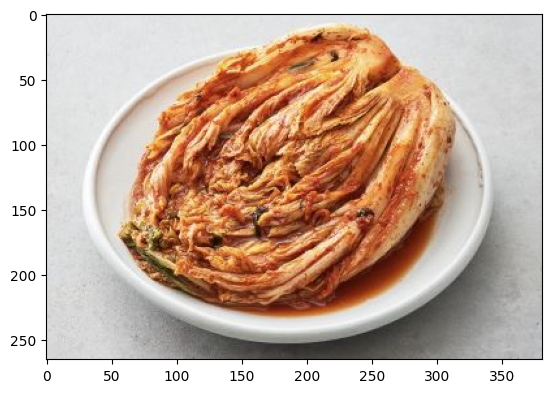

In [31]:
# 이미지 확인

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

plt.imshow(mpimg.imread(test_samples[0]))
plt.show()

<Figure size 400x300 with 0 Axes>

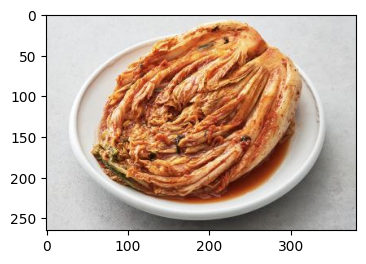

테스트 파일 :  ./kfood-samples\test_김치_1.jpg
실제 :  김치
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

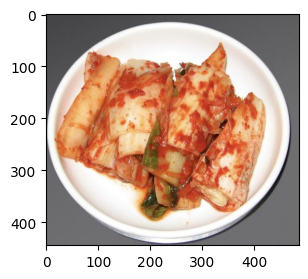

테스트 파일 :  ./kfood-samples\test_김치_2.jpg
실제 :  김치
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

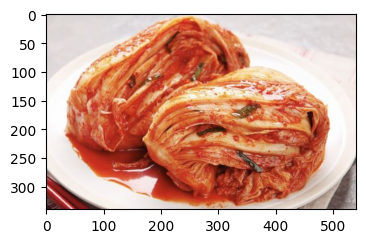

테스트 파일 :  ./kfood-samples\test_김치_3.jpg
실제 :  김치
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

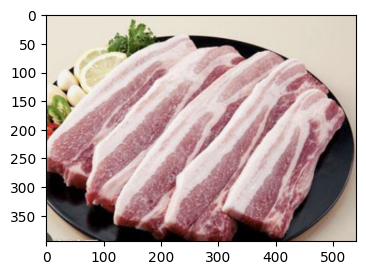

테스트 파일 :  ./kfood-samples\test_삼겹살_1.jpg
실제 :  삼겹살
예측 :  SoybeanPasteStew


<Figure size 400x300 with 0 Axes>

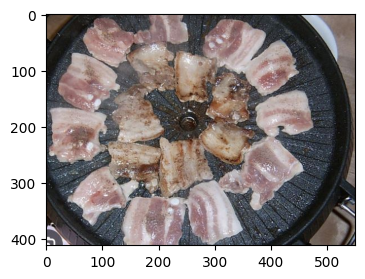

테스트 파일 :  ./kfood-samples\test_삼겹살_2.jpg
실제 :  삼겹살
예측 :  SoybeanPasteStew


<Figure size 400x300 with 0 Axes>

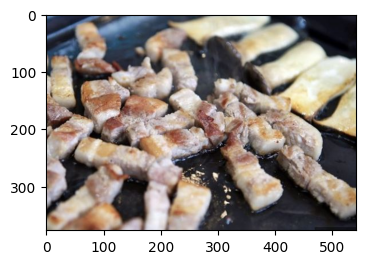

테스트 파일 :  ./kfood-samples\test_삼겹살_3.jpg
실제 :  삼겹살
예측 :  SoybeanPasteStew


<Figure size 400x300 with 0 Axes>

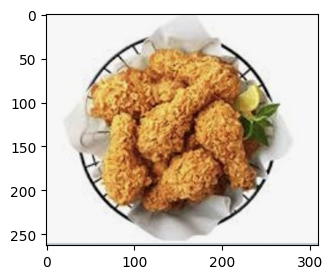

테스트 파일 :  ./kfood-samples\test_치킨_1.jpg
실제 :  치킨
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

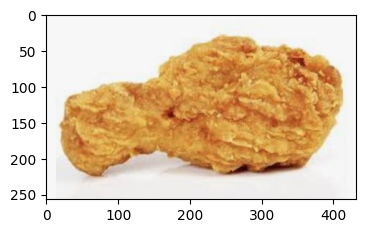

테스트 파일 :  ./kfood-samples\test_치킨_2.jpg
실제 :  치킨
예측 :  Chicken


In [32]:
# 예측 결과 출력 
# 예측 결과 출력 
for i, p in enumerate(pred_prob):
    plt.figure(figsize=(4, 3))
    plt.imshow(mpimg.imread(test_samples[i]))
    plt.show()
    
    y = p.argmax() # 예측 확률 가장 큰 값 : 카테고리 값
    print('테스트 파일 : ', test_samples[i])
    print('실제 : ', test_samples[i].split('_')[1].split('_')[0])  # '김치' , '삼겹살', '치킨'  추출
    # './kfood-samples\\test_김치_1.jpg'
    
    print('예측 : ', categories[y])